In [1]:
# dependencies for streamlit and langchain
import streamlit as st

# dependencies for system
import asyncio

from taide_chat import taide_llm

from langchain_pinecone import PineconeVectorStore, PineconeEmbeddings
from langchain.chains.question_answering import load_qa_chain
from langchain_community.document_transformers import (
    LongContextReorder,
)
from langchain.schema import Document

from langchain.prompts import PromptTemplate
from dotenv import load_dotenv

load_dotenv()

llm = taide_llm # change this use different LLM provider

c:\Users\anson\anaconda3\envs\grad_rag\lib\site-packages\pinecone\data\index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
embeddings = PineconeEmbeddings(model="multilingual-e5-large")
index_name = "ntuim-course"
vectorstore = PineconeVectorStore(
index_name=index_name, embedding=embeddings)

In [ ]:
k = 10000
query = "hi"

vec = embeddings.embed_query(query)
docs = vectorstore.similarity_search_by_vector_with_score(embedding=vec, k=k)

score = []
for (doc, s) in docs:
    score.append(s)

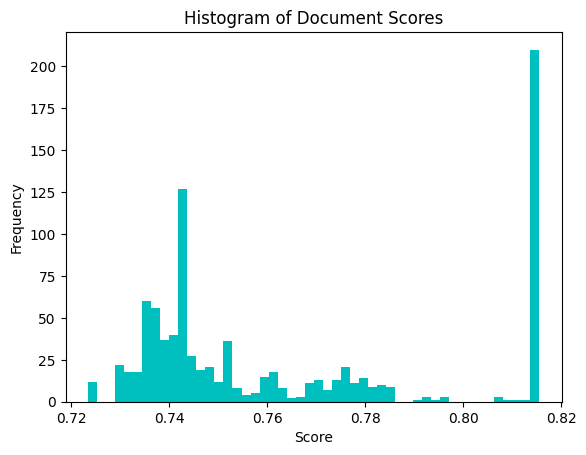

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.hist(score, bins=50, color='c')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Document Scores')
plt.show()

In [24]:
k = 5
query = "機器學習"

docs_s = vectorstore.similarity_search_by_vector_with_score(embedding=vec, k=k)
docs_m = vectorstore.max_marginal_relevance_search(query, k=k, fetch_k=k*5)

for i in range(k):
    print(f"{'-' * 10}{i}{'-' * 10}")
    print(f"Score: {docs_s[i][1]}")
    print(f"Content: {docs_s[i][0].page_content}")
    print("\n")
    print(f"Score: {docs_m[i].page_content}")

----------0----------
Score: 0.815446138
Content: passage: 專題討論 Refer to Class 01 Refer to Class 01 Refer to Class 01


Score: passage: 智慧醫療程式設計 *This course will be taught in English*

Artificial Intelligence has been taking an increasingly important role in medical applications. This course is for medical students to learn basic Python programming, data processing and analysis, machine learning algorithms and their applications on medical problems such as medical image analysis. Artificial Intelligence has been taking an increasingly important role in medical applications. This course is for medical students to lear
----------1----------
Score: 0.814076364
Content: passage: 


Score: passage: 大師給問-未來職涯巡航 為培養學生對職涯規劃的相關知能、拓展生涯探索之視野，國立臺灣大學教務處開設「大師給問-未來職涯巡航」課程，讓修課學生透過人文/社創、生物科技、機械科技、智慧/生活科技四大領域企業業師之系列講座，初步認識目前產業發展現況及職場人才需求之趨勢，同時亦可藉由業師個人職涯發展及生命經驗的分享，從中提取寶貴經驗，進而引起學生規劃未來職涯藍圖的學習契機，主動精進自我與產業鏈結的專業能力。 1.	學生透過企業創辦人或高階經理人之講座課程，認識目前產業發展現況及職場人才需求之趨勢，開拓未來職涯想像。
2.	學生藉由業師個人職涯發展及生命經驗的分享，從中提取寶貴經驗，主動建構職涯